In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

In [155]:
# Veri Yükleme
file_path = "C:\\Users\\Asus\\OneDrive\\Masaüstü\\Pusula\\Talent_Academy_Case_DT_2025.xlsx"
df = pd.read_excel(file_path)

In [156]:
# Genel Bilgi
print("Veri Seti Boyutu:", df.shape)
print("\nVeri Tipleri:\n", df.dtypes)
print("\nİlk 5 Satır:\n", df.head())

Veri Seti Boyutu: (2235, 13)

Veri Tipleri:
 HastaNo             int64
Yas                 int64
Cinsiyet           object
KanGrubu           object
Uyruk              object
KronikHastalik     object
Bolum              object
Alerji             object
Tanilar            object
TedaviAdi          object
TedaviSuresi       object
UygulamaYerleri    object
UygulamaSuresi     object
dtype: object

İlk 5 Satır:
    HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
0   145134   60    Kadın    0 Rh+  Türkiye   
1   145135   28    Erkek    0 Rh+  Türkiye   
2   145135   28    Erkek    0 Rh+  Türkiye   
3   145135   28    Erkek    0 Rh+  Türkiye   
4   145135   28    Erkek    0 Rh+  Türkiye   

                                      KronikHastalik  \
0  Becker Musküler Distrofisi, Hiportiroidizm, Ka...   
1  Duchenne Musküler Distrofisi, Myastenia gravis...   
2  Duchenne Musküler Distrofisi, Myastenia gravis...   
3  Duchenne Musküler Distrofisi, Myastenia gravis...   
4  Duchenne Musküler Distrofisi


Eksik Değerler:
 Alerji             944
KanGrubu           675
KronikHastalik     611
UygulamaYerleri    221
Cinsiyet           169
Tanilar             75
Bolum               11
HastaNo              0
Yas                  0
Uyruk                0
TedaviAdi            0
TedaviSuresi         0
UygulamaSuresi       0
dtype: int64


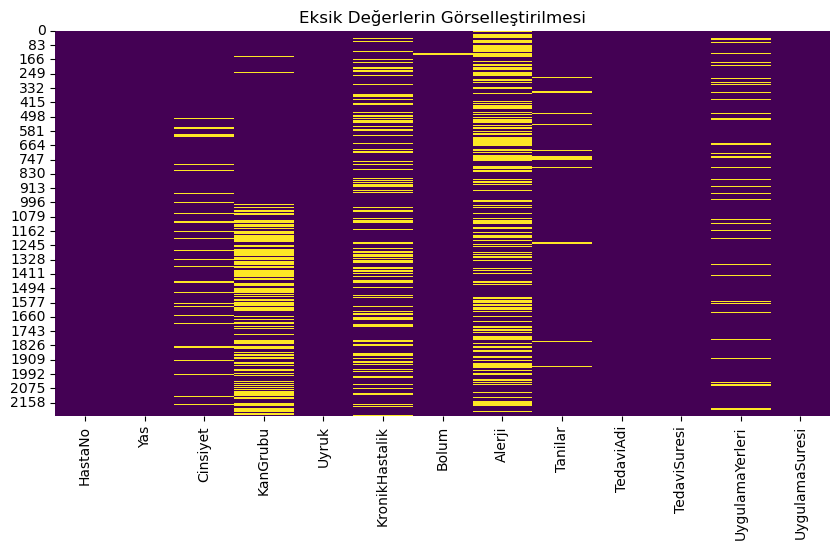

In [157]:
# Eksik Değer Analizi
missing_values = df.isna().sum().sort_values(ascending=False)
print("\nEksik Değerler:\n", missing_values)

# Eksik Değerlerin Görselleştirilmesi
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Eksik Değerlerin Görselleştirilmesi")
plt.show()

In [158]:
# Tedavi Süresi Sayısallaştırma
df["TedaviSuresi_num"] = df["TedaviSuresi"].str.extract(r'(\d+)').astype(float)

In [159]:
# Uygulama Süresi Sayısallaştırılma
df["UygulamaSuresi_num"] = df["UygulamaSuresi"].str.extract(r'(\d+)').astype(float)

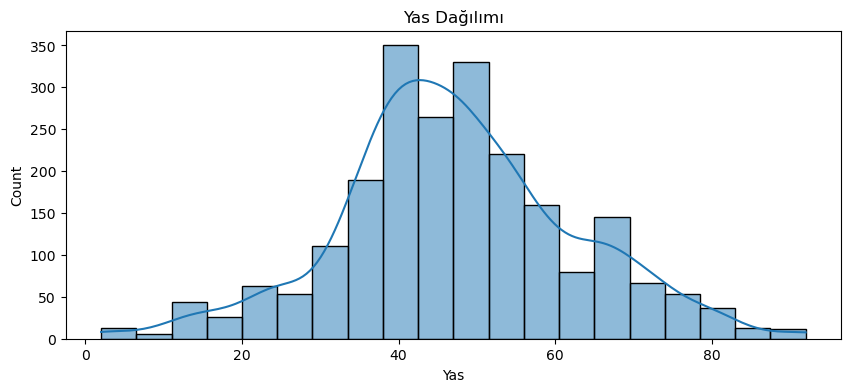

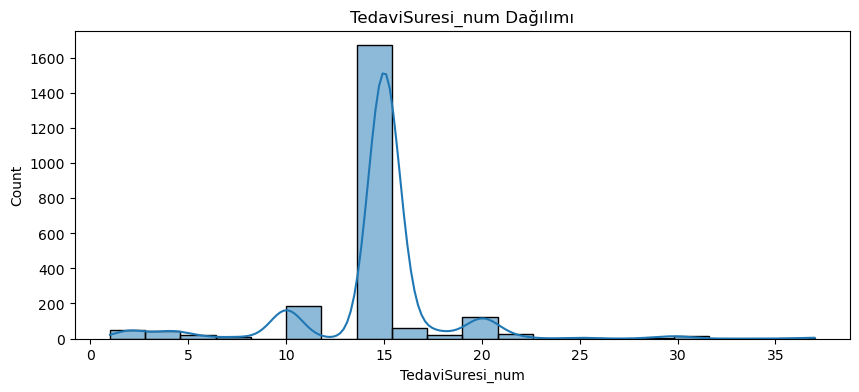

In [160]:
# Sayısal Değişkenlerin Dağılımları
numeric_cols = ["Yas", "TedaviSuresi_num"]

for col in numeric_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"{col} Dağılımı")
    plt.show()

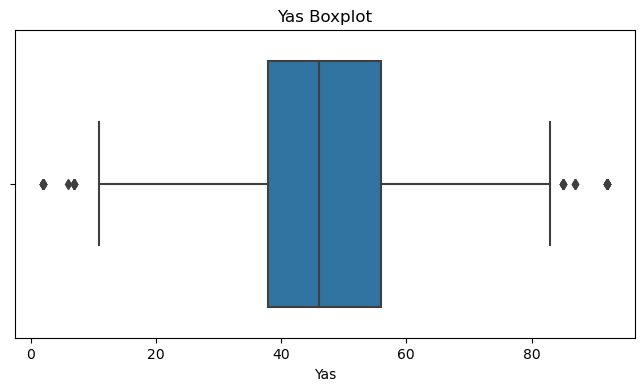

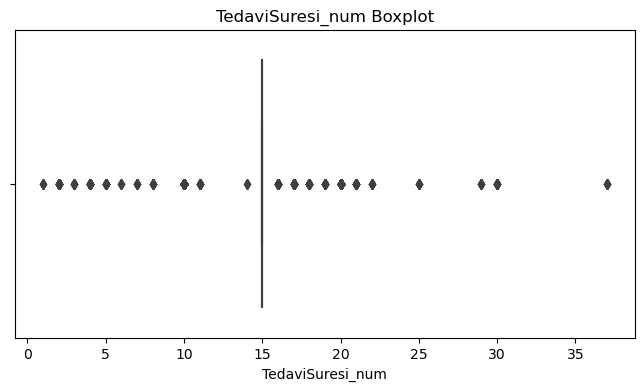

In [161]:
# Boxplot ile Outlier
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()

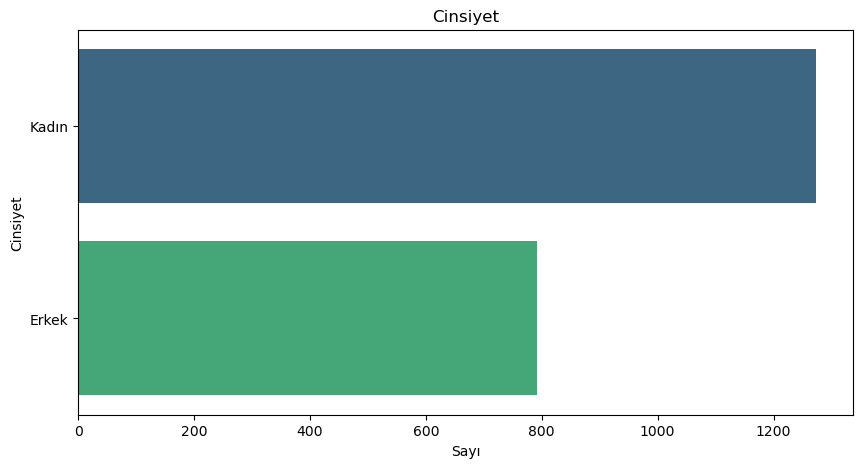

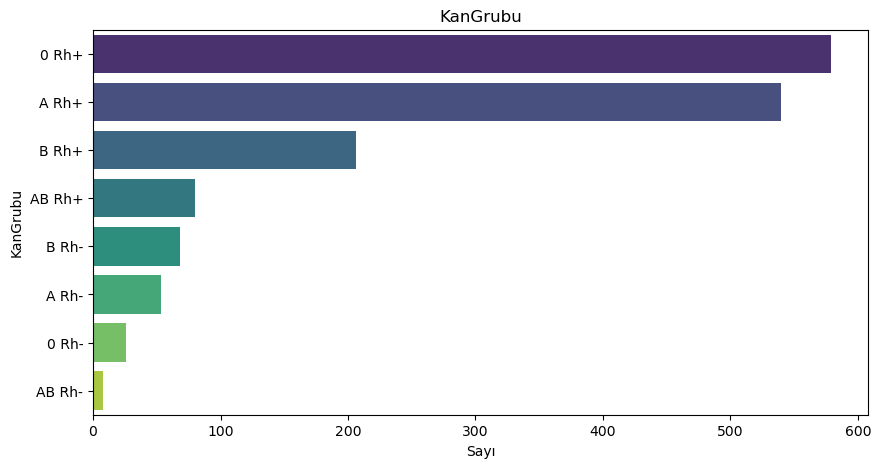

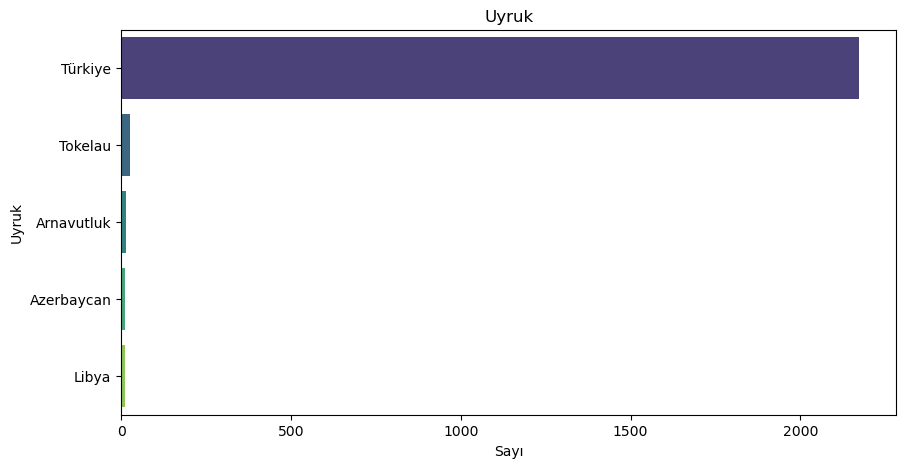

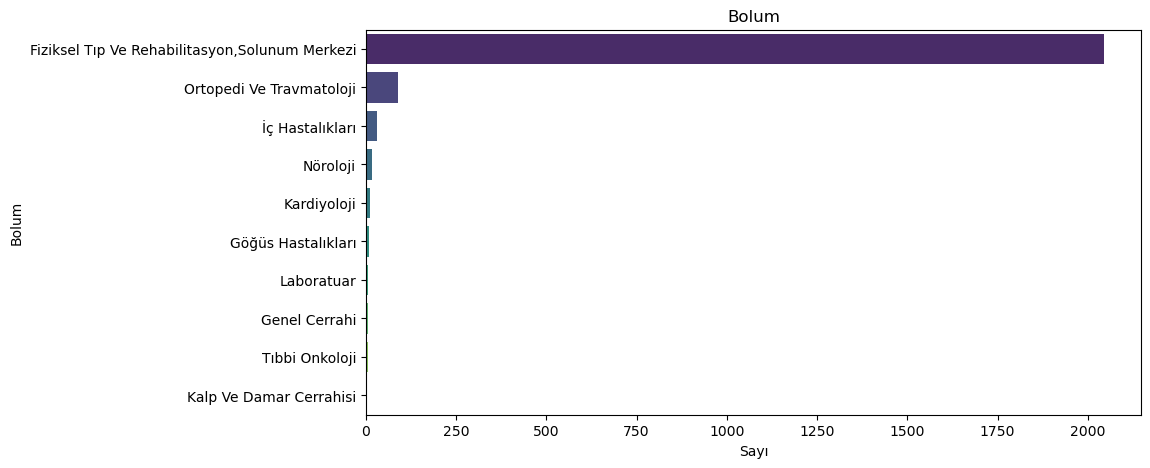

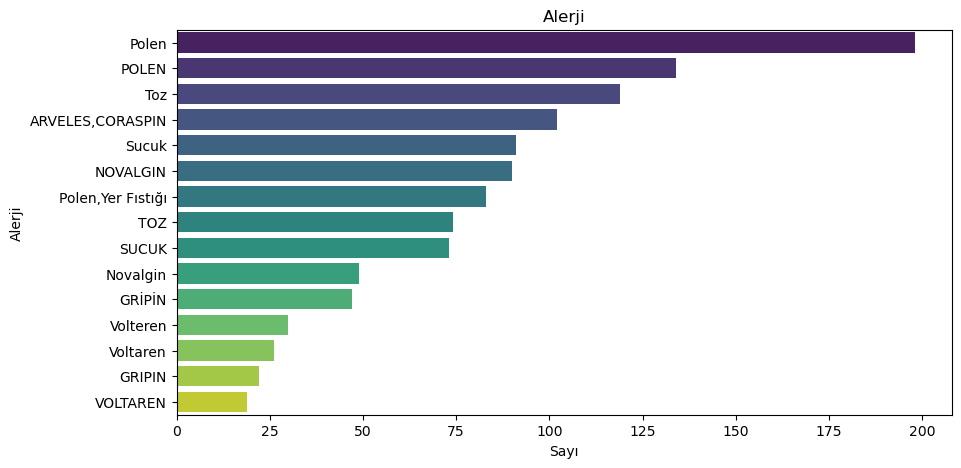

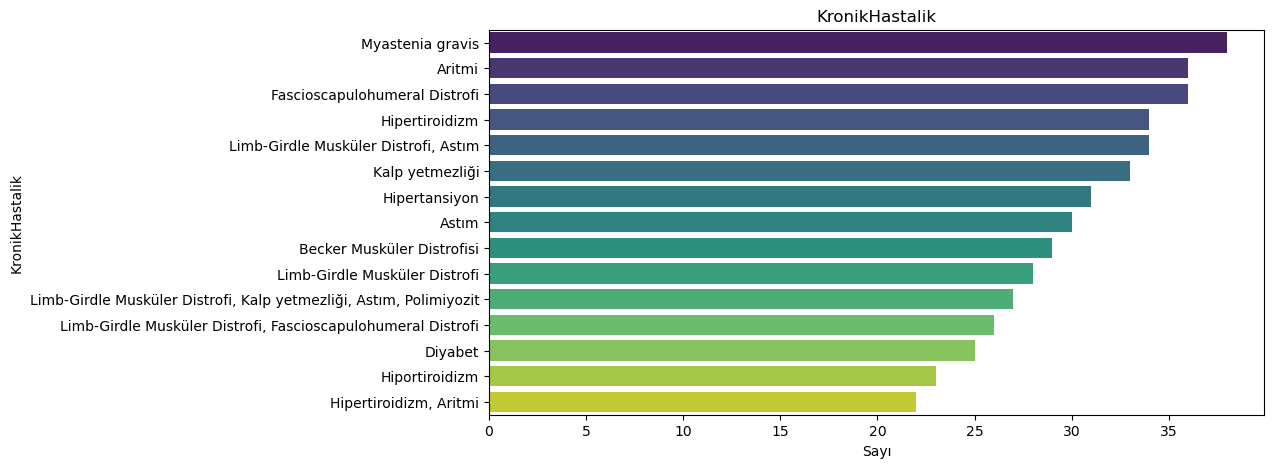

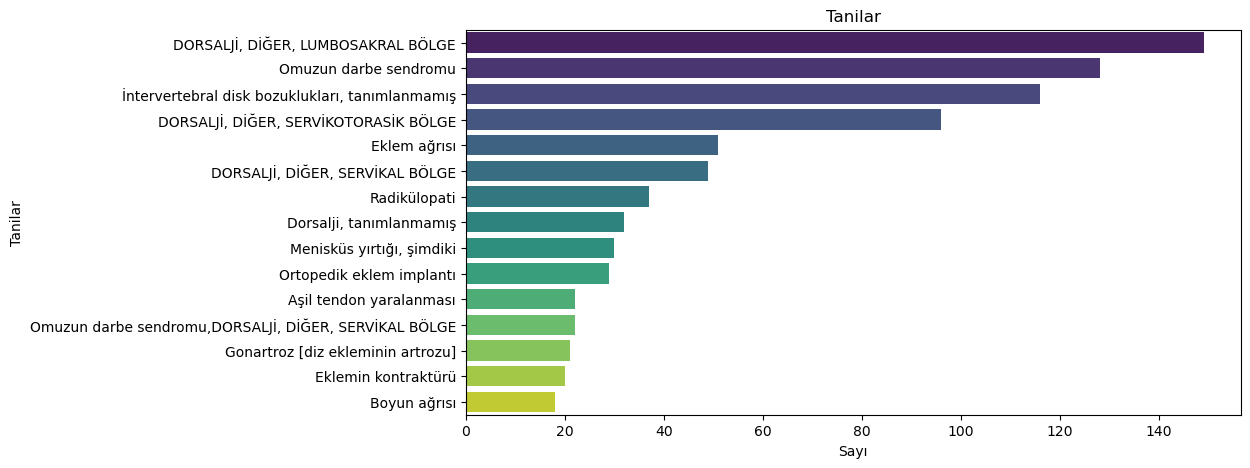

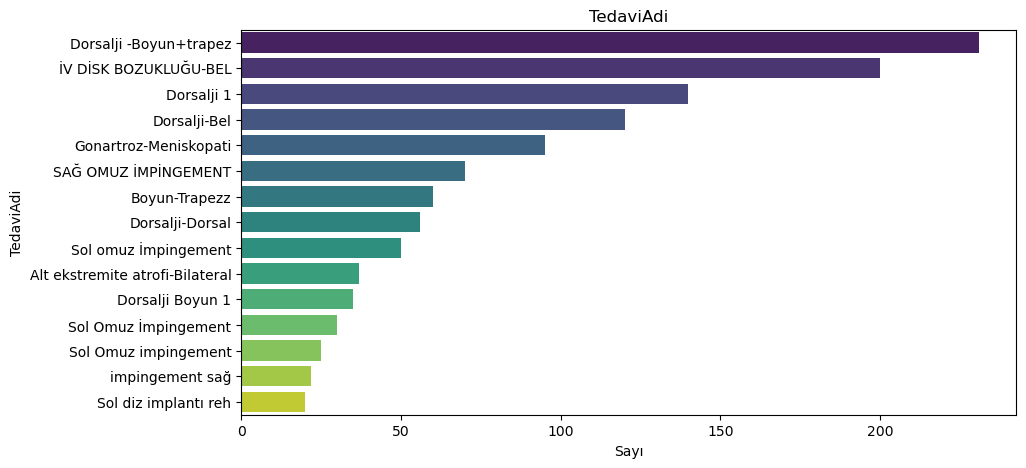

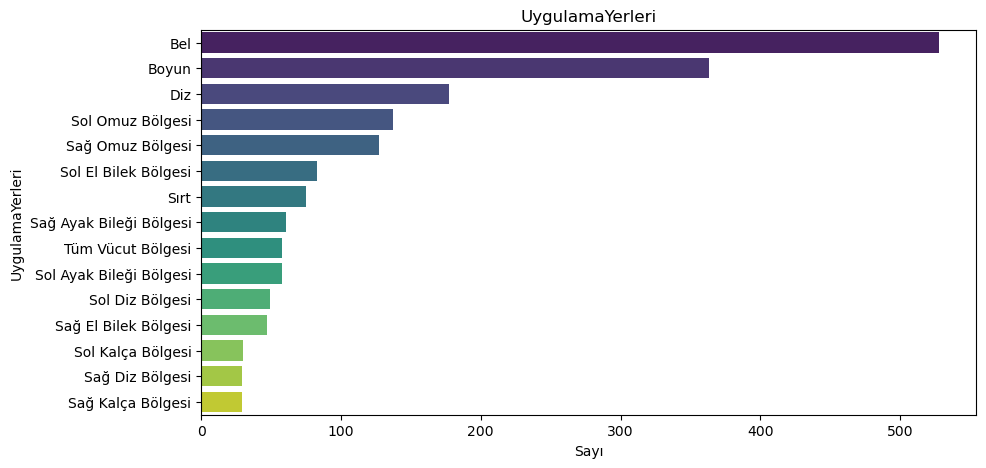

In [162]:
# Kategorik Değişkenlerin Dağılımları
categorical_cols = ["Cinsiyet", "KanGrubu", "Uyruk", "Bolum", "Alerji", 
                    "KronikHastalik", "Tanilar", "TedaviAdi", "UygulamaYerleri"]

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    
    # En sık görülen ilk 15 kategori
    top_categories = df[col].value_counts().nlargest(15).index
    
    sns.countplot(
        y=df[col],
        order=top_categories,
        palette="viridis"
    )
    
    plt.title(f"{col}")
    plt.xlabel("Sayı")
    plt.ylabel(col)
    plt.show()

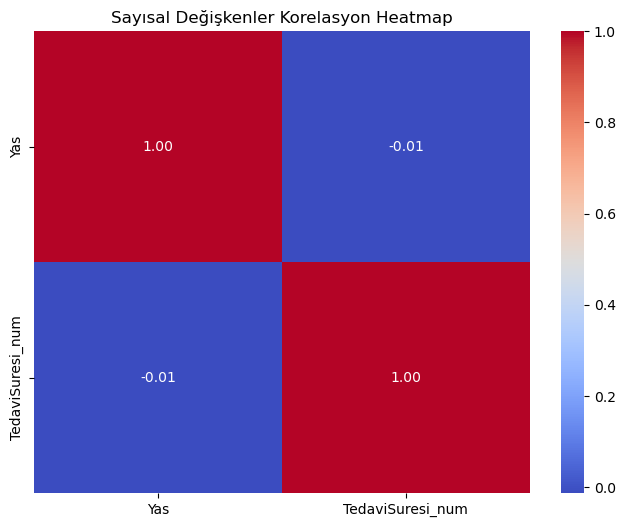

In [163]:
# Korelasyon Analizi
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sayısal Değişkenler Korelasyon Heatmap")
plt.show()

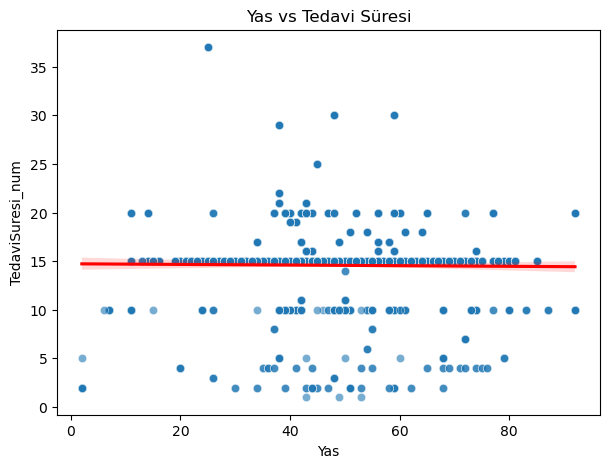

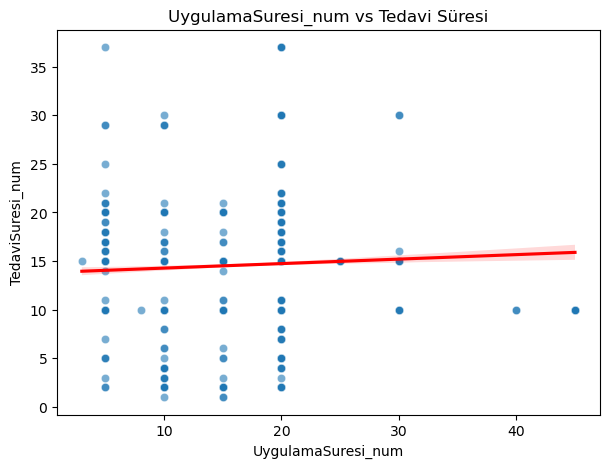

In [164]:
# Sayısal Değişkenlerin İlişkisi
num_features = ["Yas", "UygulamaSuresi_num"]

for col in num_features:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=df[col], y=df["TedaviSuresi_num"], alpha=0.6)
    sns.regplot(x=df[col], y=df["TedaviSuresi_num"], scatter=False, color="red")
    plt.title(f"{col} vs Tedavi Süresi")
    plt.show()

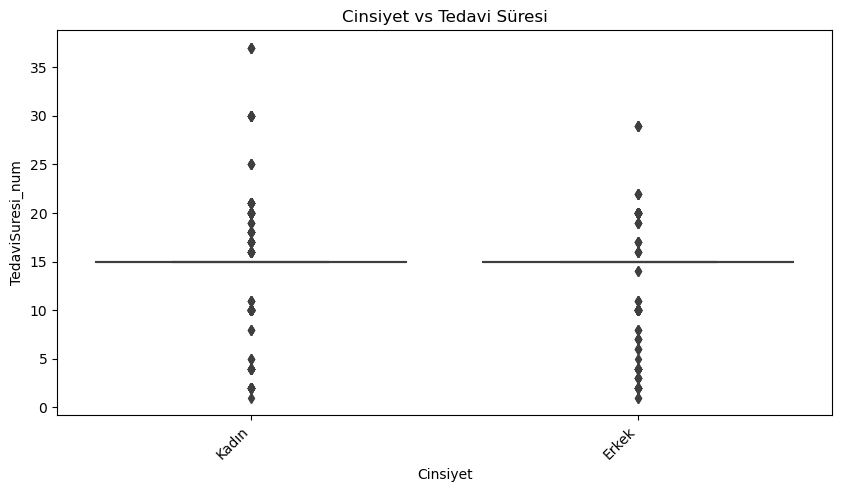

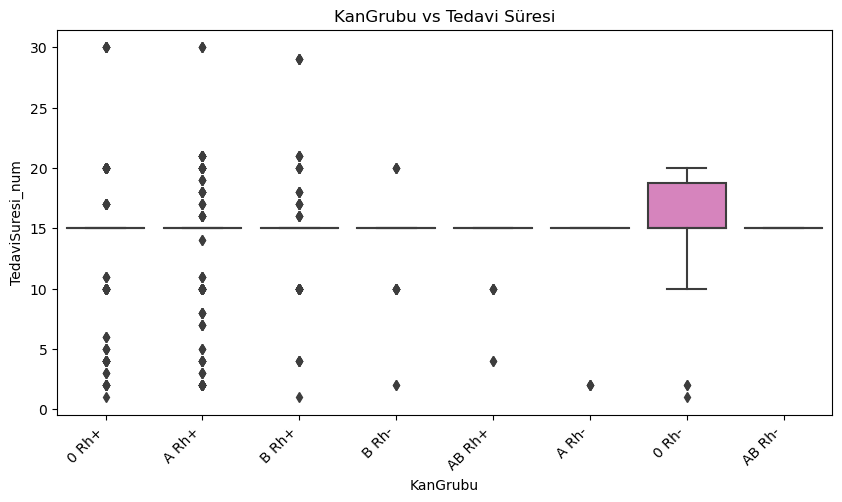

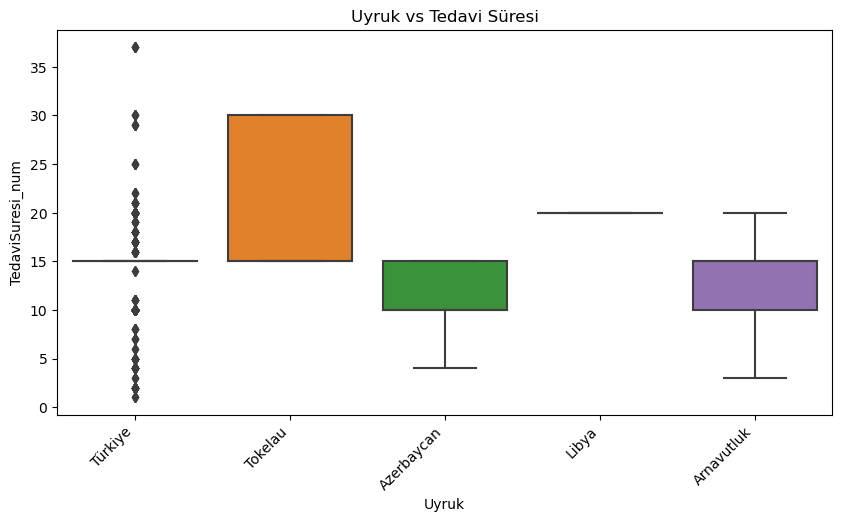

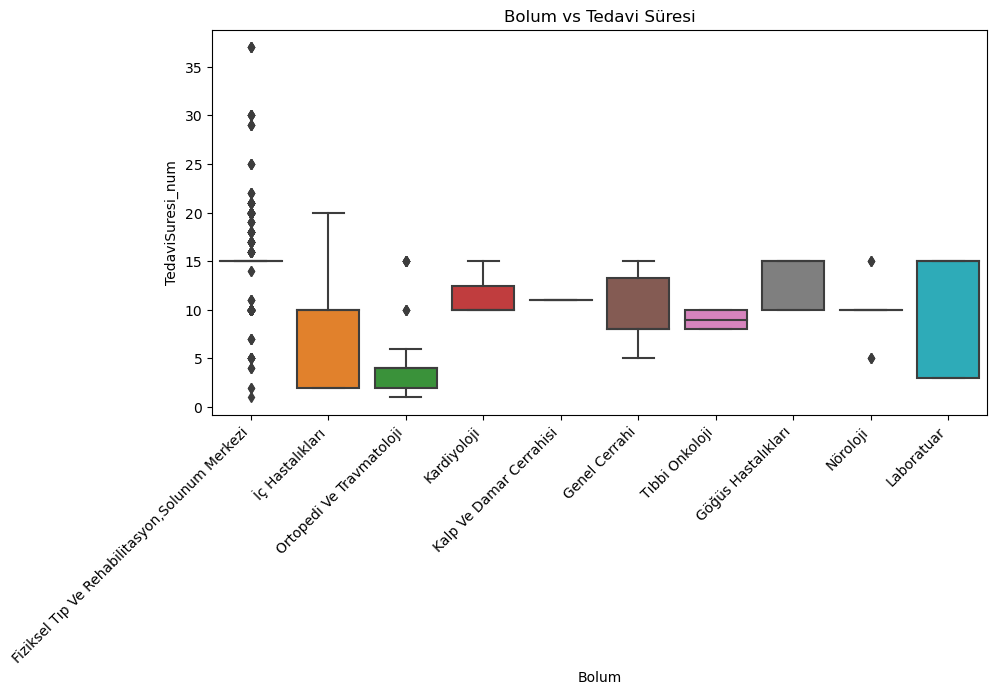

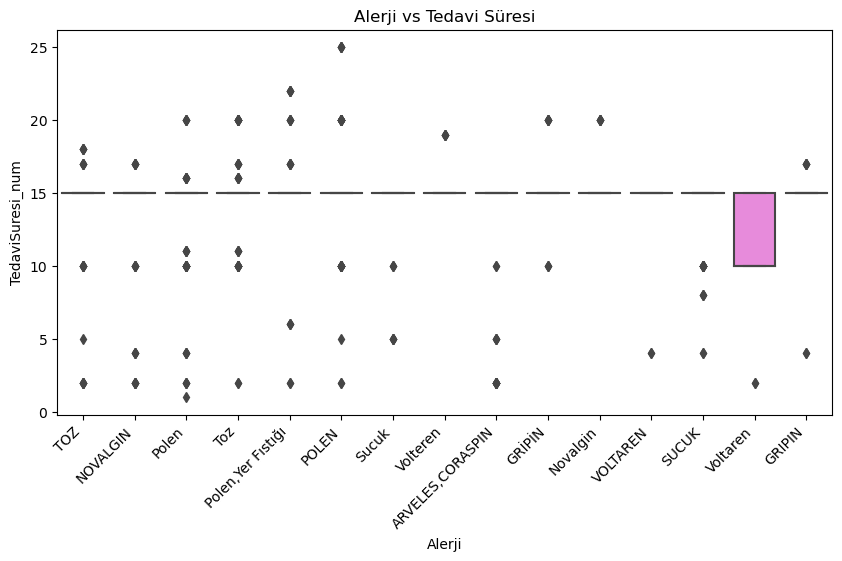

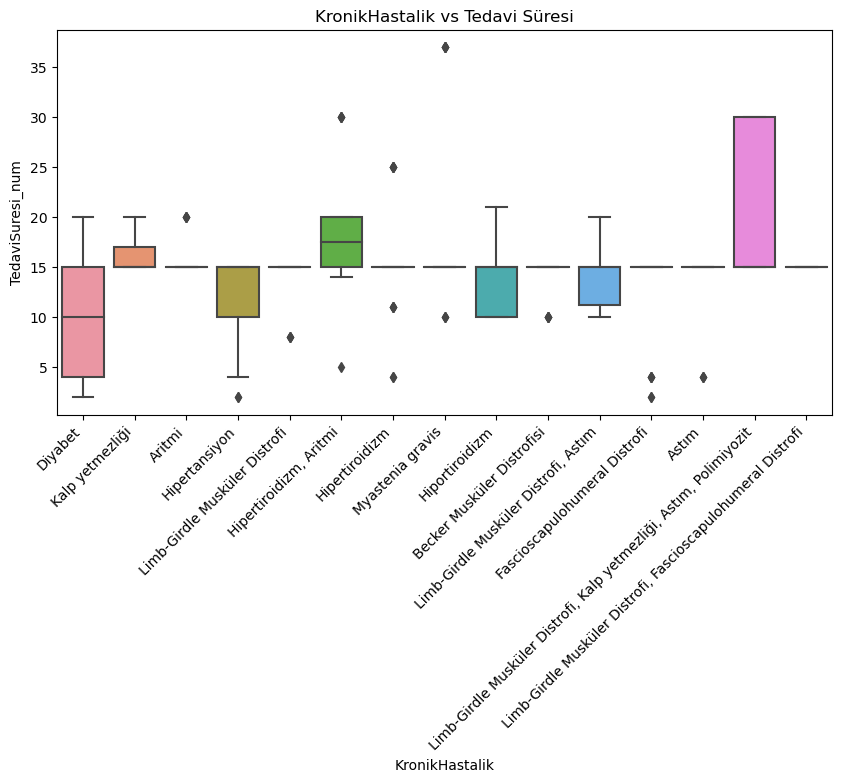

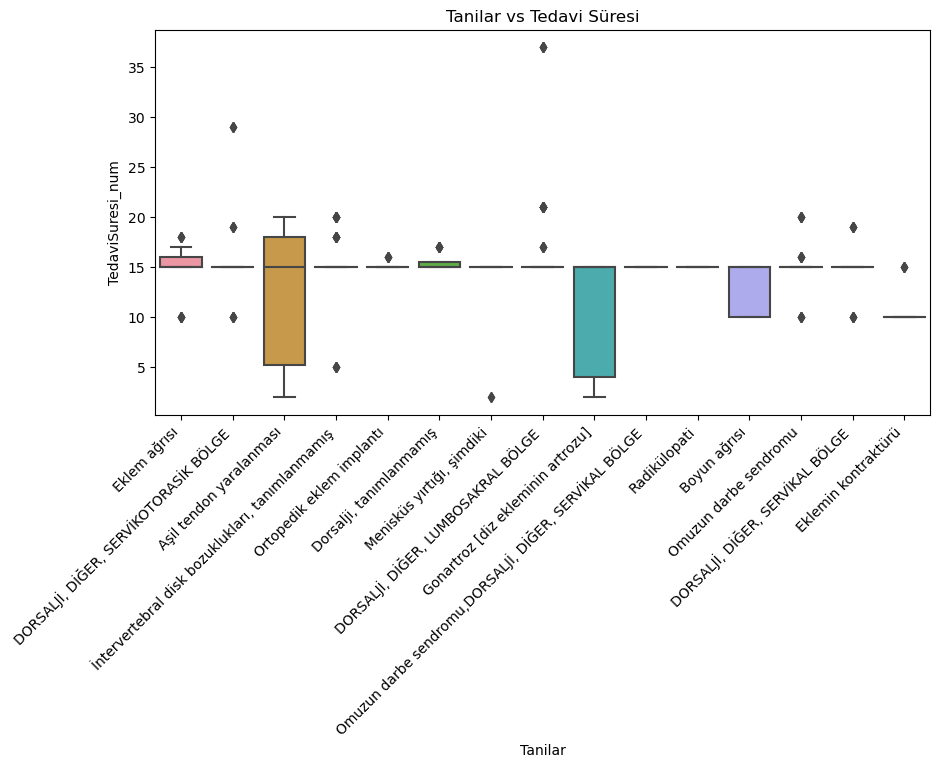

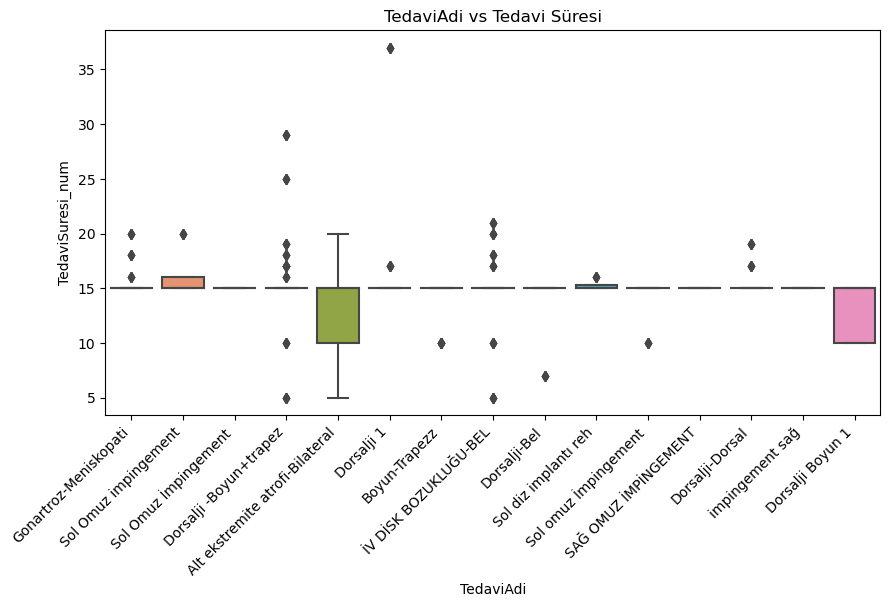

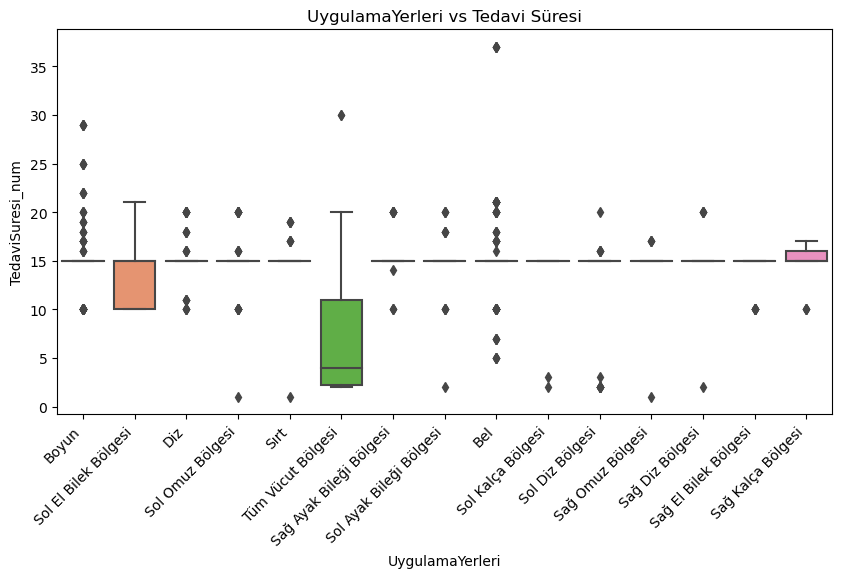

In [165]:
# Kategorik Değişkenlerin İlişkisi
cat_features = ["Cinsiyet", "KanGrubu", "Uyruk", "Bolum", "Alerji", 
                "KronikHastalik", "Tanilar", "TedaviAdi", "UygulamaYerleri"]

for col in cat_features:
    plt.figure(figsize=(10,5))
    top_vals = df[col].value_counts().head(15).index  # En sık görülen 15 kategori
    sns.boxplot(x=df[col][df[col].isin(top_vals)], 
                y=df["TedaviSuresi_num"])
    plt.title(f"{col} vs Tedavi Süresi")
    plt.xticks(rotation=45, ha="right")
    plt.show()

In [166]:
# Numerik Sütünlar
df['TedaviSuresi'] = df['TedaviSuresi'].str.extract('(\d+)').astype(float)
df['UygulamaSuresi'] = df['UygulamaSuresi'].str.extract('(\d+)').astype(float)

In [167]:
# Kayıp Veriler
# Kategorik Sütunlar
categorical_cols = ['Cinsiyet', 'KanGrubu', 'Uyruk', 'Bolum']

# Kayıp verileri, kategorikler için "Unknown" olarak ya da en yaygınla yer değiştir
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        if col == 'KanGrubu':
            df[col].fillna('Unknown', inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# KronikHastalik & Alerji 
df['KronikHastalik'].fillna("None", inplace=True)
df['Alerji'].fillna("None", inplace=True)

# Tanilar 
df['Tanilar'].fillna("Unknown", inplace=True)

# UygulamaYerleri
df['UygulamaYerleri'].fillna("Unknown", inplace=True)


In [168]:
# Çok Değerli Sütunların Encode Edilmesi
multi_value_cols = ['KronikHastalik', 'Alerji', 'Tanilar', 'UygulamaYerleri']
for col in multi_value_cols:
    df[col] = df[col].apply(lambda x: [i.strip() for i in x.split(',')] if isinstance(x, str) else [])


In [169]:
print(multi_value_cols)
print(df.columns)


['KronikHastalik', 'Alerji', 'Tanilar', 'UygulamaYerleri']
Index(['HastaNo', 'Yas', 'Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik',
       'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi',
       'UygulamaYerleri', 'UygulamaSuresi', 'TedaviSuresi_num',
       'UygulamaSuresi_num'],
      dtype='object')


In [170]:
# Çok Değerli Sütunların Multi-hot Encode Edilmesi

def multi_hot_encode_optimized(df, column):    
    
    all_values = sorted(set(
        [item for sublist in df[column] for item in sublist 
         if item not in ["None", "Unknown"]]
    ))

    multi_hot_data = {}

    for value in all_values:
        multi_hot_data[f"{column}_{value}"] = df[column].apply(lambda x: 1 if value in x else 0)

    multi_hot_df = pd.DataFrame(multi_hot_data, index=df.index)
    df = pd.concat([df, multi_hot_df], axis=1)

    return df

for col in multi_value_cols:
    df = multi_hot_encode_optimized(df, col)

df.drop(columns=multi_value_cols, inplace=True)

df = df.copy()


In [171]:
df = pd.get_dummies(df, columns=['Cinsiyet', 'KanGrubu', 'Uyruk', 'Bolum'], drop_first=True)

In [172]:
# 8. Numerik Değişkenlerin Normalizasyonu
scaler = StandardScaler()
numeric_cols = ['Yas', 'UygulamaSuresi']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [173]:
# Hedef Değer
target = 'TedaviSuresi'

X = df.drop(columns=[target, 'HastaNo']) 
y = df[target]


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
# Özet

print("Final dataset shape:", X.shape)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Final dataset shape: (2235, 375)
Training set shape: (1788, 375)
Testing set shape: (447, 375)


In [176]:
# CSV Şeklinde Kaydet
df.to_csv("processed_physical_medicine_dataset.csv", index=False)


In [177]:
print("Missing values per column:\n", df.isnull().sum())
print("Target distribution:\n", df['TedaviSuresi'].describe())


Missing values per column:
 HastaNo                           0
Yas                               0
TedaviAdi                         0
TedaviSuresi                      0
UygulamaSuresi                    0
                                 ..
Bolum_Laboratuar                  0
Bolum_Nöroloji                    0
Bolum_Ortopedi Ve Travmatoloji    0
Bolum_Tıbbi Onkoloji              0
Bolum_İç Hastalıkları             0
Length: 377, dtype: int64
Target distribution:
 count    2235.000000
mean       14.570917
std         3.725322
min         1.000000
25%        15.000000
50%        15.000000
75%        15.000000
max        37.000000
Name: TedaviSuresi, dtype: float64
